In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [4]:
df = pd.read_csv("/content/creditcard.csv")


/tmp/ipython-input-1084150528.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/creditcard.csv")


In [5]:
print(df.head())
print(df.shape)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print(df['Class'].value_counts())


Class
0.0    33656
1.0      103
Name: count, dtype: int64


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']


In [9]:
print(y.isna().sum())
print(y.value_counts(dropna=False))


1
Class
0.0    33656
1.0      103
NaN        1
Name: count, dtype: int64


In [10]:
df = df.dropna(subset=['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

print(y.isna().sum())


0


In [11]:
print(X.isna().sum().sort_values(ascending=False).head(10))


Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64


In [12]:
X = X.fillna(0)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train fraud ratio:", y_train.mean())
print("Test fraud ratio:", y_test.mean())


Train fraud ratio: 0.00303624986114711
Test fraud ratio: 0.0031101895734597157


In [14]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_log))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6731
         1.0       0.50      0.48      0.49        21

    accuracy                           1.00      6752
   macro avg       0.75      0.74      0.74      6752
weighted avg       1.00      1.00      1.00      6752



In [16]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [17]:
y_pred_rf = rf_model.predict(X_test)


In [18]:
print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

=== Random Forest Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6731
         1.0       0.93      0.62      0.74        21

    accuracy                           1.00      6752
   macro avg       0.96      0.81      0.87      6752
weighted avg       1.00      1.00      1.00      6752



In [19]:
print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

=== Random Forest Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6731
         1.0       0.93      0.62      0.74        21

    accuracy                           1.00      6752
   macro avg       0.96      0.81      0.87      6752
weighted avg       1.00      1.00      1.00      6752



In [20]:
importances = rf_model.feature_importances_
features = X.columns

feat_imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp_df.head(10))

   Feature  Importance
14     V14    0.190298
3       V3    0.148661
4       V4    0.115401
10     V10    0.093948
12     V12    0.072375
17     V17    0.069067
2       V2    0.061162
11     V11    0.056057
16     V16    0.047985
9       V9    0.027245


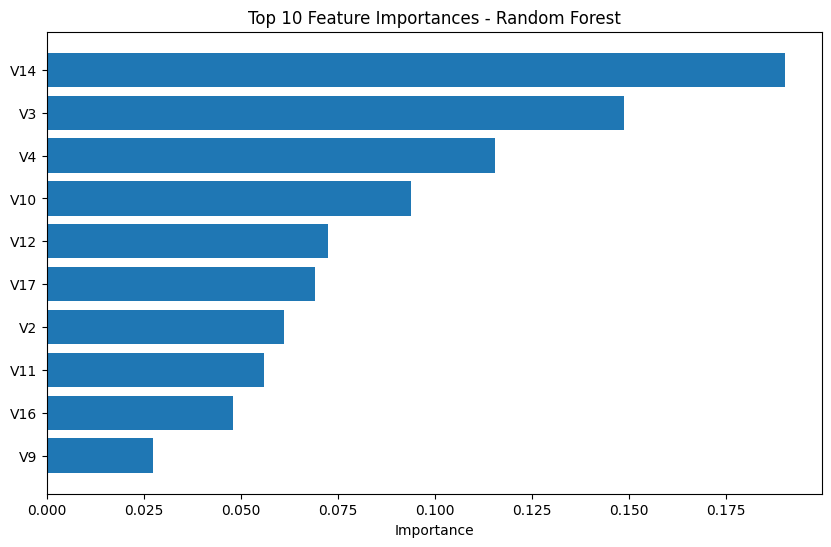

In [21]:
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df["Feature"][:10], feat_imp_df["Importance"][:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()


In [22]:
joblib.dump(rf_model, "random_forest_fraud_model.pkl")

print("Model saved as random_forest_fraud_model.pkl")

Model saved as random_forest_fraud_model.pkl
